# Visualization of Smart Cities

## Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import FastMarkerCluster

In [2]:
# Check for the working directory
!pwd

/Users/escortkwon/Code/Portfolio_Project_2021/Smart Cities


In [3]:
# Check for what files does certain directory have
!ls

SmartCities_Visualization.ipynb countries.csv
Smart_City_index_headers.csv    country_and_continent.csv
archive.zip                     worldcities.csv


In [4]:
# Unzip for fetch data
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Smart_City_index_headers.csv  


In [5]:
data = pd.read_csv('Smart_City_index_headers.csv')
data

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


In [6]:
cities = pd.read_csv('worldcities.csv')
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
40996,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
40997,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
40998,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
40999,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [7]:
continents = pd.read_csv('country_and_continent.csv')
continents

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


## Data Preprocessing

### data

In [8]:
# Check null values by columns
data.isnull().sum()

Id                                   0
City                                 0
Country                              0
Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64

In [9]:
# Check what columns do I have
data.columns

Index(['Id', 'City', 'Country', 'Smart_Mobility ', 'Smart_Environment',
       'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [10]:
# There are some spaces of each column head
# Therefore, we need to remove those
dict_rename = {'Smart_Mobility ': 'Smart_Mobility',
          'Smart_Government ': 'Smart_Government',
          'Smart_Economy ': 'Smart_Economy'
          }
dict_rename

{'Smart_Mobility ': 'Smart_Mobility',
 'Smart_Government ': 'Smart_Government',
 'Smart_Economy ': 'Smart_Economy'}

In [11]:
data.rename(columns=dict_rename, inplace=True)
data

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


### cities

In [12]:
# Check null values by columns
cities.isnull().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             31
iso3              0
admin_name       99
capital       31518
population      738
id                0
dtype: int64

In [13]:
# Remove rows which has nulll values
cities.dropna(axis=0, inplace=True)
cities.reset_index(drop=True, inplace=True)
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
8690,Telsen,Telsen,-42.3833,-66.9500,Argentina,AR,ARG,Chubut,minor,544.0,1032824407
8691,Greytown,Greytown,10.9167,-83.7000,Nicaragua,NI,NIC,Río San Juan,minor,275.0,1558125707
8692,Sayḩūt,Sayhut,15.2105,51.2454,Yemen,YE,YEM,Al Mahrah,minor,189.0,1887613470
8693,La Esmeralda,La Esmeralda,3.1738,-65.5466,Venezuela,VE,VEN,Amazonas,minor,150.0,1862255876


In [14]:
# Re-Check null values by columns
cities.isnull().sum()

city          0
city_ascii    0
lat           0
lng           0
country       0
iso2          0
iso3          0
admin_name    0
capital       0
population    0
id            0
dtype: int64

### continents

In [15]:
continents.isnull().sum()

Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

In [16]:
# Remove rows which has nulll values
continents.dropna(axis=0, inplace=True)
continents.reset_index(drop=True, inplace=True)
continents

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
209,South America,SA,"Venezuela, Bolivarian Republic of",VE,VEN,862.0
210,Oceania,OC,Wallis and Futuna,WF,WLF,876.0
211,Oceania,OC,"Samoa, Independent State of",WS,WSM,882.0
212,Asia,AS,Yemen,YE,YEM,887.0


## Data Preparation

In [17]:
# Merge two DataFrames
cities_continents = pd.merge(cities, continents, left_on='iso2', right_on='Two_Letter_Country_Code')
cities_continents

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764,Asia,AS,Japan,JP,JPN,392.0
1,Ōsaka,Osaka,34.7500,135.4601,Japan,JP,JPN,Ōsaka,admin,14977000.0,1392419823,Asia,AS,Japan,JP,JPN,392.0
2,Nagoya,Nagoya,35.1167,136.9333,Japan,JP,JPN,Aichi,admin,9113000.0,1392407472,Asia,AS,Japan,JP,JPN,392.0
3,Yokohama,Yokohama,35.4333,139.6333,Japan,JP,JPN,Kanagawa,admin,3757630.0,1392118339,Asia,AS,Japan,JP,JPN,392.0
4,Fukuoka,Fukuoka,33.6000,130.4167,Japan,JP,JPN,Fukuoka,admin,2128000.0,1392576294,Asia,AS,Japan,JP,JPN,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,Tidjikja,Tidjikja,18.5500,-11.4166,Mauritania,MR,MRT,Tagant,admin,19981.0,1478594780,Africa,AF,"Mauritania, Islamic Republic of",MR,MRT,478.0
7868,Aleg,Aleg,17.0580,-13.9090,Mauritania,MR,MRT,Brakna,admin,8388.0,1478173139,Africa,AF,"Mauritania, Islamic Republic of",MR,MRT,478.0
7869,Aioun,Aioun,16.6667,-9.6167,Mauritania,MR,MRT,Hodh el Gharbi,admin,1423.0,1478255260,Africa,AF,"Mauritania, Islamic Republic of",MR,MRT,478.0
7870,Sélibaby,Selibaby,15.1670,-12.1833,Mauritania,MR,MRT,Guidimaka,admin,460.0,1478575433,Africa,AF,"Mauritania, Islamic Republic of",MR,MRT,478.0


In [18]:
# Drop unnecessary columns
cities_continents.drop(columns=['city', 'admin_name', 'capital', 'population', 'id', 'Continent_Code', 'Country_Name', 'Two_Letter_Country_Code', 'Three_Letter_Country_Code', 'Country_Number'], inplace=True)
cities_continents

,city_ascii,lat,lng,country,iso2,iso3,Continent_Name
0,Tokyo,35.6897,139.6922,Japan,JP,JPN,Asia
1,Osaka,34.7500,135.4601,Japan,JP,JPN,Asia
2,Nagoya,35.1167,136.9333,Japan,JP,JPN,Asia
3,Yokohama,35.4333,139.6333,Japan,JP,JPN,Asia
4,Fukuoka,33.6000,130.4167,Japan,JP,JPN,Asia
...,...,...,...,...,...,...,...
7867,Tidjikja,18.5500,-11.4166,Mauritania,MR,MRT,Africa
7868,Aleg,17.0580,-13.9090,Mauritania,MR,MRT,Africa
7869,Aioun,16.6667,-9.6167,Mauritania,MR,MRT,Africa
7870,Selibaby,15.1670,-12.1833,Mauritania,MR,MRT,Africa


In [19]:
# Check Null values
cities_continents.isnull().sum()

city_ascii        0
lat               0
lng               0
country           0
iso2              0
iso3              0
Continent_Name    0
dtype: int64

## Visualization

### Bar Plot

In [20]:
# Check unique values of continents
cities_continents['Continent_Name'].unique()

array(['Asia', 'South America', 'Africa', 'Europe', 'Oceania'],
      dtype=object)

In [21]:
# Define variable in order to filter 'cities_continents'
continent = input('>>> Input Continent Name: ')
continent

'Asia'

In [22]:
# We have too muich data on 'cities_continents'
# So, we will figure out continents by continents
cities_continents_filtered = cities_continents[cities_continents['Continent_Name'] == continent]
cities_continents_filtered

,city_ascii,lat,lng,country,iso2,iso3,Continent_Name
0,Tokyo,35.6897,139.6922,Japan,JP,JPN,Asia
1,Osaka,34.7500,135.4601,Japan,JP,JPN,Asia
2,Nagoya,35.1167,136.9333,Japan,JP,JPN,Asia
3,Yokohama,35.4333,139.6333,Japan,JP,JPN,Asia
4,Fukuoka,33.6000,130.4167,Japan,JP,JPN,Asia
...,...,...,...,...,...,...,...
7758,Punakha,27.6167,89.8667,Bhutan,BT,BTN,Asia
7759,Samtse,26.8667,89.1000,Bhutan,BT,BTN,Asia
7775,Bandar Seri Begawan,4.9167,114.9167,Brunei,BN,BRN,Asia
7776,Kuala Belait,4.5828,114.1918,Brunei,BN,BRN,Asia


In [23]:
# Prepare DataFrame for Visualization
cities_continents_visualization = pd.merge(data, cities_continents_filtered, left_on='City', right_on='city_ascii')
cities_continents_visualization.drop(['Id', 'SmartCity_Index', 'SmartCity_Index_relative_Edmonton', 'city_ascii', 'country'], axis=1, inplace=True)
cities_continents_visualization

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,lat,lng,iso2,iso3,Continent_Name
0,Singapore,Singapore,5790,4344,5560,5535,9695,10000,1.3000,103.8000,SG,SGP,Asia
1,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,25.0478,121.5319,TW,TWN,Asia
2,Tokyo,Japan,7787,4516,5476,1800,4158,9320,35.6897,139.6922,JP,JPN,Asia
3,Osaka,Japan,7233,4758,5732,2105,3403,9320,34.7500,135.4601,JP,JPN,Asia
4,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,36.3510,127.3850,KR,KOR,Asia
5,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,24.4781,54.3686,AE,ARE,Asia
6,Seoul,South Korea,6250,3754,5222,1490,7860,4710,37.5600,126.9900,KR,KOR,Asia
7,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,25.2697,55.3094,AE,ARE,Asia
8,Shanghai,China,6870,2936,3842,4430,4423,1980,31.1667,121.4667,CN,CHN,Asia
9,Moscow,Russia,5015,2772,5078,5030,4143,4100,55.7558,37.6178,RU,RUS,Asia


In [24]:
# Insert "Smart_Total" column in order to compare total index

for i in range(2, 8):
    cities_continents_visualization['Smart_Total'] = np.empty(shape=(len(cities_continents_visualization.index), 1))
    cities_continents_visualization['Smart_Total'] += cities_continents_visualization.iloc[:, i]
    cities_continents_visualization['Smart_Total']

cities_continents_visualization

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,lat,lng,iso2,iso3,Continent_Name,Smart_Total
0,Singapore,Singapore,5790,4344,5560,5535,9695,10000,1.3000,103.8000,SG,SGP,Asia,40924.0
1,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,25.0478,121.5319,TW,TWN,Asia,34906.0
2,Tokyo,Japan,7787,4516,5476,1800,4158,9320,35.6897,139.6922,JP,JPN,Asia,33057.0
3,Osaka,Japan,7233,4758,5732,2105,3403,9320,34.7500,135.4601,JP,JPN,Asia,32551.0
4,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,36.3510,127.3850,KR,KOR,Asia,31109.0
5,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,24.4781,54.3686,AE,ARE,Asia,26746.0
6,Seoul,South Korea,6250,3754,5222,1490,7860,4710,37.5600,126.9900,KR,KOR,Asia,29286.0
7,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,25.2697,55.3094,AE,ARE,Asia,24922.0
8,Shanghai,China,6870,2936,3842,4430,4423,1980,31.1667,121.4667,CN,CHN,Asia,24481.0
9,Moscow,Russia,5015,2772,5078,5030,4143,4100,55.7558,37.6178,RU,RUS,Asia,26138.0


In [25]:
# Relocation of columns
cities_continents_visualization = cities_continents_visualization[['City', 'Country', 'Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living', 'Smart_Total', 'lat', 'lng', 'iso2', 'iso3', 'Continent_Name']]
cities_continents_visualization

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Smart_Total,lat,lng,iso2,iso3,Continent_Name
0,Singapore,Singapore,5790,4344,5560,5535,9695,10000,40924.0,1.3000,103.8000,SG,SGP,Asia
1,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,34906.0,25.0478,121.5319,TW,TWN,Asia
2,Tokyo,Japan,7787,4516,5476,1800,4158,9320,33057.0,35.6897,139.6922,JP,JPN,Asia
3,Osaka,Japan,7233,4758,5732,2105,3403,9320,32551.0,34.7500,135.4601,JP,JPN,Asia
4,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,31109.0,36.3510,127.3850,KR,KOR,Asia
5,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,26746.0,24.4781,54.3686,AE,ARE,Asia
6,Seoul,South Korea,6250,3754,5222,1490,7860,4710,29286.0,37.5600,126.9900,KR,KOR,Asia
7,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,24922.0,25.2697,55.3094,AE,ARE,Asia
8,Shanghai,China,6870,2936,3842,4430,4423,1980,24481.0,31.1667,121.4667,CN,CHN,Asia
9,Moscow,Russia,5015,2772,5078,5030,4143,4100,26138.0,55.7558,37.6178,RU,RUS,Asia


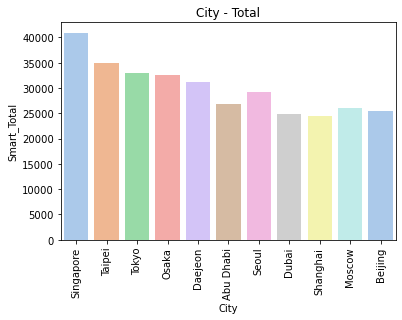

In [26]:
# Display Single Plot
sns.barplot(data=cities_continents_visualization, x='City', y='Smart_Total', palette='pastel')
plt.xticks(rotation=90)
plt.title('City - Total')

plt.show()

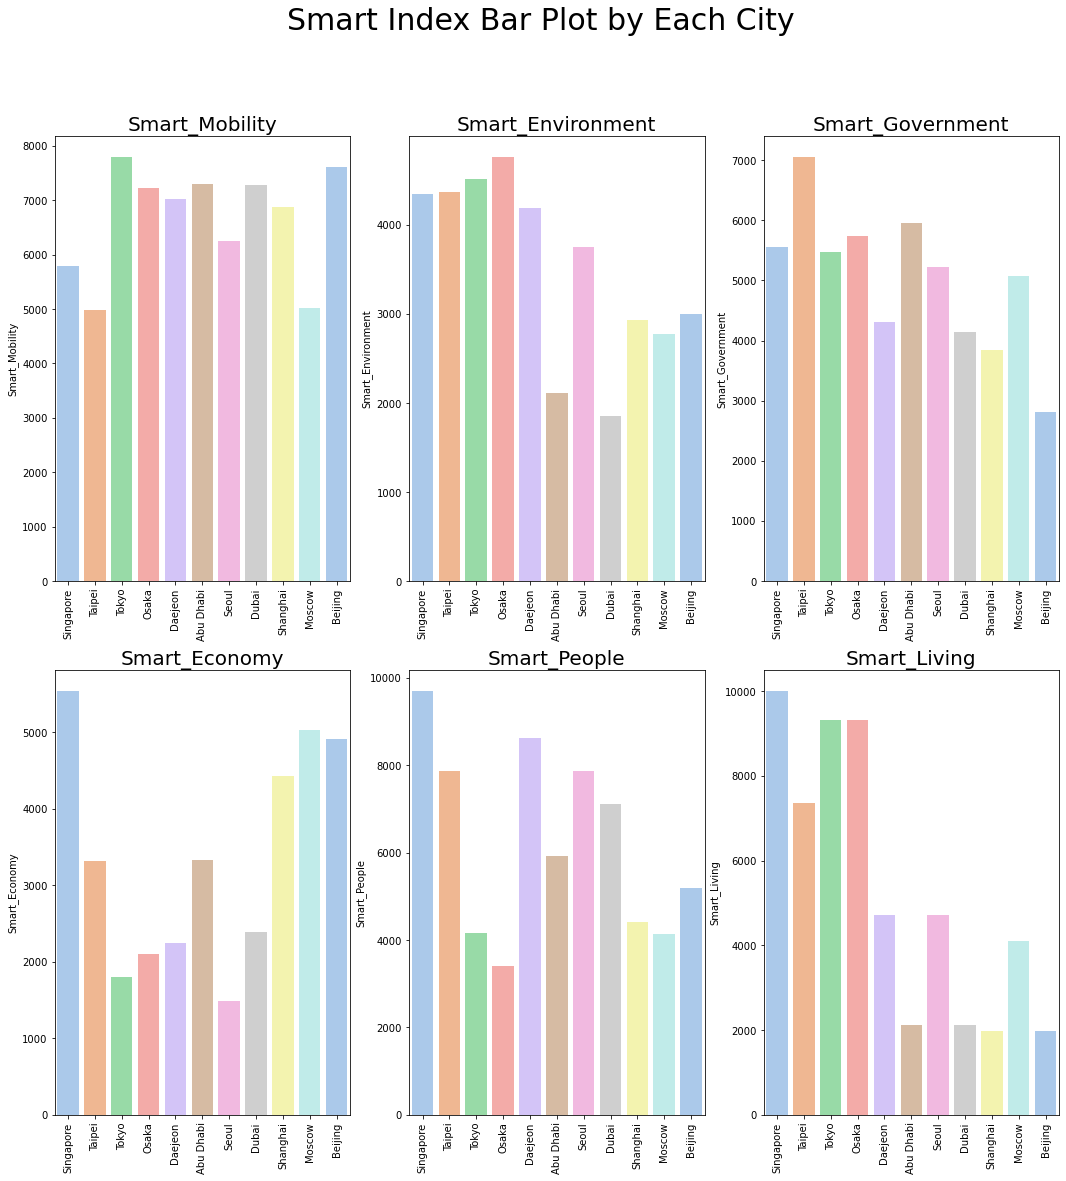

In [27]:
# Display Subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.suptitle('Smart Index Bar Plot by Each City', fontsize=30)
fig.set_size_inches(18, 18)

sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Mobility", palette='pastel', ax=ax1)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Environment", palette='pastel', ax=ax2)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Government", palette='pastel', ax=ax3)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Economy", palette='pastel', ax=ax4)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_People", palette='pastel', ax=ax5)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Living", palette='pastel', ax=ax6)

# Smart_Mobility / ax1
ax1.set(ylabel='Smart_Mobility')
ax1.set_title(label="Smart_Mobility", fontdict={'size': 20})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(xlabel=None)

# Smart_Environment / ax2
ax2.set(ylabel='Smart_Environment')
ax2.set_title(label="Smart_Environment", fontdict={'size': 20})
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set(xlabel=None)

# Smart_Government / ax3
ax3.set(ylabel='Smart_Government')
ax3.set_title(label="Smart_Government", fontdict={'size': 20})
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax3.set(xlabel=None)

# Smart_Economy / ax4
ax4.set(ylabel='Smart_Economy')
ax4.set_title(label="Smart_Economy", fontdict={'size': 20})
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax4.set(xlabel=None)

# Smart_People / ax5
ax5.set(ylabel='Smart_People')
ax5.set_title(label="Smart_People", fontdict={'size': 20})
ax5.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax5.set(xlabel=None)

# Smart_Living / ax6
ax6.set(ylabel='Smart_Living')
ax6.set_title(label="Smart_Living", fontdict={'size': 20})
ax6.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax6.set(xlabel=None)

plt.show()

### Heatmap

In [28]:
cities_continents_visualization_copy = cities_continents_visualization.copy()
cities_continents_heatmap = cities_continents_visualization.drop(['Country', 'Smart_Total', 'lat', 'lng', 'iso2', 'iso3'], axis=1, inplace=True)
cities_continents_heatmap

/Users/escortkwon/miniforge3/envs/Drill_DL_TF/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
cities_continents_pivot = cities_continents_visualization.pivot(index='City', columns='Continent_Name')
cities_continents_pivot

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living
Continent_Name,Asia,Asia,Asia,Asia,Asia,Asia
City,,,,,,
Abu Dhabi,7302,2108,5948,3325,5933,2130
Beijing,7610,2998,2806,4905,5183,1980
Daejeon,7018,4192,4304,2250,8635,4710
Dubai,7280,1850,4142,2395,7125,2130
Moscow,5015,2772,5078,5030,4143,4100
Osaka,7233,4758,5732,2105,3403,9320
Seoul,6250,3754,5222,1490,7860,4710
Shanghai,6870,2936,3842,4430,4423,1980


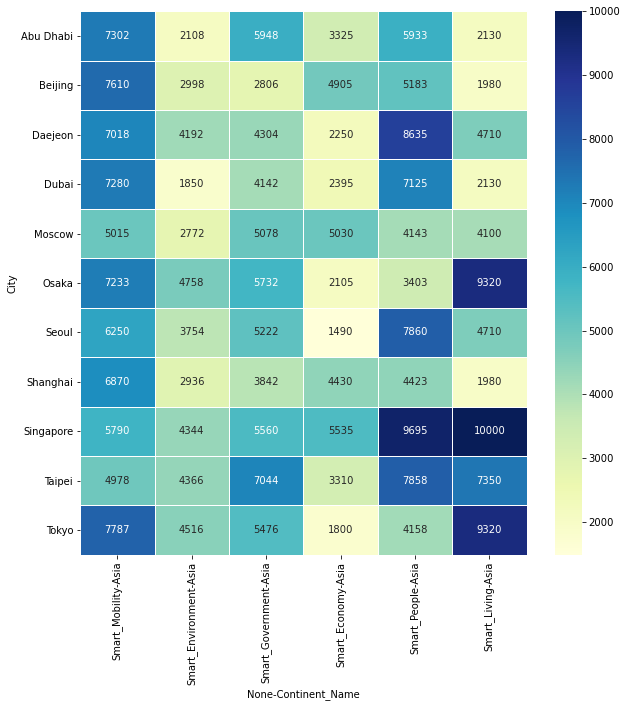

In [30]:
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=cities_continents_pivot, annot=True, annot_kws={"size":10},linewidths=.5, cmap="YlGnBu", fmt="")
plt.show()

### Map

In [58]:
# Display a map centered in Asia
map = folium.Map(location=(29, 100), zoom_start=3)
map

In [32]:
cities_continents_visualization_copy

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Smart_Total,lat,lng,iso2,iso3,Continent_Name
0,Singapore,Singapore,5790,4344,5560,5535,9695,10000,40924.0,1.3000,103.8000,SG,SGP,Asia
1,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,34906.0,25.0478,121.5319,TW,TWN,Asia
2,Tokyo,Japan,7787,4516,5476,1800,4158,9320,33057.0,35.6897,139.6922,JP,JPN,Asia
3,Osaka,Japan,7233,4758,5732,2105,3403,9320,32551.0,34.7500,135.4601,JP,JPN,Asia
4,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,31109.0,36.3510,127.3850,KR,KOR,Asia
5,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,26746.0,24.4781,54.3686,AE,ARE,Asia
6,Seoul,South Korea,6250,3754,5222,1490,7860,4710,29286.0,37.5600,126.9900,KR,KOR,Asia
7,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,24922.0,25.2697,55.3094,AE,ARE,Asia
8,Shanghai,China,6870,2936,3842,4430,4423,1980,24481.0,31.1667,121.4667,CN,CHN,Asia
9,Moscow,Russia,5015,2772,5078,5030,4143,4100,26138.0,55.7558,37.6178,RU,RUS,Asia


In [64]:
# Display Circle Marker on the map

for lat, long, total, radius in zip(cities_continents_visualization_copy['lat'], cities_continents_visualization_copy['lng'], cities_continents_visualization_copy['Smart_Total'], cities_continents_visualization_copy['Smart_Total']):
    folium.CircleMarker(
        location=[lat, long],
        radius = radius / 750,
        fill=True,
        fill_opacity=0.3,
        popup=("Total", total)
    ).add_to(map)

map

In [62]:
# FastMarkerCluster

FastMarkerCluster(data=cities_continents_visualization_copy[['lat', 'lng']]).add_to(map)
folium.LayerControl().add_to(map)

map